# Running Canonical Monte Carlo Sampling

In [2]:
import numpy as np
import json
from pymatgen.core.structure import Structure
from smol.io import load_work, save_work
import os
import random
import json
import math

### 0) Load the previous LNO CE with electrostatics

In [23]:
#work_path = '/Users/myless/Packages/structure_maker/Expansions/un_fixed_vcrtizrw_fin_work.mson'
#work_path = '/Users/myless/Packages/structure_maker/Expansions/single_prim_altered_struc_vcrtizrw_fin_work.mson'
#work_path = '/Users/myless/Packages/structure_maker/Expansions/VCrTiWZr'
#expansion_path = 'Zr0_109-Ti0_062-V0_611-Cr0_109-W0_109_fin_work.mson'
#expansion_path = '../Expansions/VCrTiWZr_Test/Zr0_109-Ti0_062-V0_611-Cr0_109-W0_109_fin_work.mson'
#expansion_path = '../Expansions/VCrTiWZr/Cr0_034-Ti0_0943-Zr0_0359-W0_0648-V0_771_fin_work.mson'
expansion_path = '../Expansions/VCrTiWZr/Cr0_0172-Ti0_031-Zr0_014-W0_035-V0_9028_fin_work.mson'
#expansion_path = '../Expansions/VCrTiWZr/Cr0_0923-Ti0_0513-Zr0_0206-W0_0322-V0_8036_fin_work.mson'
#total_path = os.path.join(work_path,expansion_path)
work = load_work(expansion_path)
expansion = work['ClusterExpansion']

In [3]:
# create cluster expansion from scratch using modules 
import sys 
sys.path.append('../Modules')
from cluster_creator import prim_entry_dataloader, cluster_subspace_creator, structure_wrangler_creator 
from eci_fitter import eci_fitter
from structure_generation import create_cca_primitive, closest_composition


### Debug

In [13]:
# create cluster expansion from scratch using modules for each composition 
from monty.serialization import loadfn, dumpfn

compositions = json.load(open('compositions.json','r'))
entries = loadfn('../Entries/vcrtiwzr_entries.json')
a = 3.01
cutoffs={2 : 5, 3 : 4.1, 4 : 3.5}


comp = compositions[0]
print(comp)

# Create a list of formatted strings
formatted_items = [f'{k}{str(v).replace(".", "_")}' for k, v in comp.items()]

# Join the strings with '-'
expansion_path = '-'.join(formatted_items) + '_fin_work.mson'
work_path = '../Expansions/VCrTiWZr'

#expansion_path = comp + '_fin_work.mson'
total_path = os.path.join(work_path,expansion_path)

# create the prim structure based off composition 
prim = create_cca_primitive(comp,3.01)

print(prim)

# define subspace and wrangler
subspace = cluster_subspace_creator(prim=prim, cutoffs=cutoffs, verbose=True)
wrangler = structure_wrangler_creator(subspace=subspace, entries=entries,ncpu=-1,verbose=True)

# fit the expansion
expansion = eci_fitter(wrangler,subspace)

# save the expansion
#save_work(total_path, wrangler, expansion)

{'Cr': 0.0675, 'Ti': 0.0123, 'Zr': 0.021, 'W': 0.0301, 'V': 0.8691}
Full Formula (Zr0.021 Ti0.0123 V0.8691 Cr0.0675 W0.0301)
Reduced Formula: Zr0.021Ti0.0123V0.8691Cr0.0675W0.0301
abc   :   2.606736   2.606736   2.606736
angles: 109.471221 109.471221 109.471221
pbc   :       True       True       True
Sites (1)
  #  SP                                                a    b    c
---  ----------------------------------------------  ---  ---  ---
  0  Zr:0.021, Ti:0.012, V:0.869, Cr:0.068, W:0.030    0    0    0
Basis/Orthogonal/Orthonormal : sinusoid/True/False
       Unit Cell Composition : Cr0.0675 Ti0.0123 Zr0.021 W0.0301 V0.8691
            Number of Orbits : 8
No. of Correlation Functions : 140
             Cluster Cutoffs : 2: 4.99, 3: 3.01, 4: 3.01
              External Terms : []
Orbit Summary
 ------------------------------------------------------------------------
 |  ID     Degree    Cluster Diameter    Multiplicity    No. Functions  |
 |   0       0             NA            

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:   18.1s
[Parallel(n_jobs=-1)]: Done 180 tasks      | elapsed:   52.3s
[Parallel(n_jobs=-1)]: Done 230 out of 230 | elapsed:  1.0min finished
/opt/homebrew/Caskroom/miniforge/base/envs/smol/lib/python3.10/site-packages/smol/cofe/wrangling/wrangler.py:808: UserWarning: The following structures have duplicated correlation vectors:
 Index 4 - Zr3 Ti4 V54 Cr2 W1 energy=-569.66880864
Index 32 - Zr3 Ti4 V54 Cr2 W1 energy=-569.66908674
 Consider adding more terms to the clustersubspace or filtering duplicates.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/smol/lib/python3.10/site-packages/smol/cofe/wrangling/wrangler.py:808: UserWarning: The following structures have duplicated correlation vectors:
 Index 25 - Zr3 Ti4 V47 Cr5 W5 energy=-587.31883282
Index 37 - Zr3 Ti4 V47 Cr5 W5 energy=-587.3188017
 Consider adding more terms to the clustersubspace or


Total structures that match 230/230
RMSE 0.804193700532345 meV/prim
MAX 3.3335572802730695 meV/prim
The predicted energy for a structure with composition Zr2 Ti3 V53 Cr4 W2 is -9.017467975616455 eV/prim.

The fitted coefficients are:
[-2.47991227e+09  8.19653892e+09 -1.70608209e+09  4.96825254e+09
  4.04296969e+09 -4.81435623e+09  5.26185930e+09 -3.47110669e+09
 -7.02329113e+09 -1.13682316e+09  4.76755671e+09 -7.44360752e+08
  2.62099396e+09 -2.94686085e+09 -1.97261245e+09 -4.66974307e+09
  2.58098080e+09 -8.20318732e+09 -1.79467190e+09 -7.04964133e+08
 -3.49464016e+08 -1.38656387e+09 -5.00524432e+09 -1.76518653e+09
 -2.07743913e+09 -2.67876625e-01 -2.01669693e-01 -2.68710613e-01
 -2.12259293e-02 -2.35300064e-02 -1.69133186e-01 -4.91952896e-03
 -6.30607605e-02 -1.16758108e-01 -3.54137421e-02 -3.53223562e-01
 -3.65849733e-01 -8.05189610e-02  8.13193321e-02 -7.74912834e-02
 -1.95816040e-01  1.71894133e-02  1.47696733e-01 -2.06921101e-02
 -1.58083439e-02  2.25974846e+08 -1.40013244e+10  

### mass generate Cluster Expansion

In [ ]:
# I want to create compositions that are in the V-Cr-Ti space 
# I want to range Ti and Cr from 0.01 to 0.2 in 0.01 increments, with V as the balance element, i.e if Cr = 0.01 and Ti = 0.01, then V = 0.98

# I want to create a list of compositions that are in the V-Cr-Ti space
compositions = json.load(open('compositions.json','r'))
#print(compositions)


compositions = [{'V' : 0.90625, 'Cr' : 0.046875, 'Ti' : 0.046875},
                    {'V' : 0.603515625, 'Cr' : 0.30078125, 'Ti' : 0.095703125},
                    {'V' : 0.76171875, 'Cr' : 0.126953125, 'Ti' : 0.111328125},
                    {'V' : 0.603515625, 'Cr' : 0.095703125, 'Ti' : 0.30078125},
                    ]

compositions = [{'V' : 0.906, 'Cr' : 0.047, 'Ti' : 0.047},
                {'V' : 0.604, 'Cr' : 0.301, 'Ti' : 0.095},
                {'V' : 0.762, 'Cr' : 0.127, 'Ti' : 0.111},
                {'V' : 0.604, 'Cr' : 0.096, 'Ti' : 0.300},
                ]

def euclidean_distance(comp1, comp2):
    return math.sqrt((comp1['V'] - comp2['V'])**2 + (comp1['Cr'] - comp2['Cr'])**2 + (comp1['Ti'] - comp2['Ti'])**2)

def is_too_close(new_comp, existing_comps, threshold):
    for comp in existing_comps:
        if euclidean_distance(new_comp, comp) < threshold:
            return True
    return False

def monte_carlo_compositions(min_v_percent, supercell_size, num_samples, existing_compositions, threshold):
    compositions = []
    min_value = 0.01
    max_value = 0.2

    for _ in range(num_samples):
        cr = random.uniform(min_value, max_value)
        ti = random.uniform(min_value, max_value)
        v = 1.0 - cr - ti
        if v >= min_v_percent / 100.0:
            v_atoms = round(v * supercell_size)
            cr_atoms = round(cr * supercell_size)
            ti_atoms = round(ti * supercell_size)

            # Recalculate the composition based on the rounded atom counts
            total_atoms = v_atoms + cr_atoms + ti_atoms
            v = v_atoms / total_atoms
            cr = cr_atoms / total_atoms
            ti = ti_atoms / total_atoms

            # Ensure the composition adds up to exactly one
            if round(v + cr + ti, 3) == 1.0:
                new_comp = {'V': round(v, 3), 'Cr': round(cr, 3), 'Ti': round(ti, 3)}
                if not is_too_close(new_comp, existing_compositions, threshold):
                    compositions.append(new_comp)

    return compositions

# Example usage
min_v_percent = 60
supercell_size = 125
num_samples = 50  # Number of random samples to generate
threshold = 0.025  # Distance threshold to consider compositions as too close

# Load existing compositions from a JSON file
existing_compositions = json.load(open('compositions.json', 'r'))

new_compositions = monte_carlo_compositions(min_v_percent, supercell_size, num_samples, compositions, threshold)


#compositions = [{'V' : 0.344, 'Cr' : 0.328, 'Ti' : 0.328}]

In [12]:
compositions.extend(new_compositions)
with open('new_compositions.json', 'w') as f:
    json.dump(compositions, f, indent=4)

for comp in new_compositions:
    print(comp)

{'V': 0.84, 'Cr': 0.048, 'Ti': 0.112}
{'V': 0.762, 'Cr': 0.071, 'Ti': 0.167}
{'V': 0.8, 'Cr': 0.168, 'Ti': 0.032}
{'V': 0.808, 'Cr': 0.168, 'Ti': 0.024}
{'V': 0.8, 'Cr': 0.152, 'Ti': 0.048}
{'V': 0.754, 'Cr': 0.056, 'Ti': 0.19}
{'V': 0.88, 'Cr': 0.016, 'Ti': 0.104}
{'V': 0.879, 'Cr': 0.113, 'Ti': 0.008}
{'V': 0.712, 'Cr': 0.112, 'Ti': 0.176}
{'V': 0.833, 'Cr': 0.135, 'Ti': 0.032}
{'V': 0.8, 'Cr': 0.072, 'Ti': 0.128}
{'V': 0.752, 'Cr': 0.104, 'Ti': 0.144}
{'V': 0.69, 'Cr': 0.183, 'Ti': 0.127}
{'V': 0.88, 'Cr': 0.064, 'Ti': 0.056}
{'V': 0.696, 'Cr': 0.168, 'Ti': 0.136}
{'V': 0.76, 'Cr': 0.096, 'Ti': 0.144}
{'V': 0.728, 'Cr': 0.08, 'Ti': 0.192}
{'V': 0.896, 'Cr': 0.088, 'Ti': 0.016}
{'V': 0.766, 'Cr': 0.161, 'Ti': 0.073}
{'V': 0.728, 'Cr': 0.112, 'Ti': 0.16}
{'V': 0.738, 'Cr': 0.167, 'Ti': 0.095}
{'V': 0.76, 'Cr': 0.056, 'Ti': 0.184}
{'V': 0.936, 'Cr': 0.016, 'Ti': 0.048}
{'V': 0.816, 'Cr': 0.072, 'Ti': 0.112}
{'V': 0.672, 'Cr': 0.152, 'Ti': 0.176}
{'V': 0.808, 'Cr': 0.056, 'Ti': 0.136}
{

In [ ]:
# Example usage
min_v_percent = 90
supercell_size = 125
num_samples = 10  # Number of random samples to generate
threshold = 0.025  # Distance threshold to consider compositions as too close
new_compositions_2 = monte_carlo_compositions(min_v_percent, supercell_size, num_samples, compositions, threshold)


compositions.extend(new_compositions_2)

In [16]:
compositions[-1] = {'V': 0.786, 'Cr': 0.056, 'Ti': 0.158}


In [17]:
with open('new_compositions_2.json', 'w') as f:
    json.dump(compositions, f)

for comp in new_compositions:
    print(comp)

{'V': 0.84, 'Cr': 0.048, 'Ti': 0.112}
{'V': 0.762, 'Cr': 0.071, 'Ti': 0.167}
{'V': 0.8, 'Cr': 0.168, 'Ti': 0.032}
{'V': 0.808, 'Cr': 0.168, 'Ti': 0.024}
{'V': 0.8, 'Cr': 0.152, 'Ti': 0.048}
{'V': 0.754, 'Cr': 0.056, 'Ti': 0.19}
{'V': 0.88, 'Cr': 0.016, 'Ti': 0.104}
{'V': 0.879, 'Cr': 0.113, 'Ti': 0.008}
{'V': 0.712, 'Cr': 0.112, 'Ti': 0.176}
{'V': 0.833, 'Cr': 0.135, 'Ti': 0.032}
{'V': 0.8, 'Cr': 0.072, 'Ti': 0.128}
{'V': 0.752, 'Cr': 0.104, 'Ti': 0.144}
{'V': 0.69, 'Cr': 0.183, 'Ti': 0.127}
{'V': 0.88, 'Cr': 0.064, 'Ti': 0.056}
{'V': 0.696, 'Cr': 0.168, 'Ti': 0.136}
{'V': 0.76, 'Cr': 0.096, 'Ti': 0.144}
{'V': 0.728, 'Cr': 0.08, 'Ti': 0.192}
{'V': 0.896, 'Cr': 0.088, 'Ti': 0.016}
{'V': 0.766, 'Cr': 0.161, 'Ti': 0.073}
{'V': 0.728, 'Cr': 0.112, 'Ti': 0.16}
{'V': 0.738, 'Cr': 0.167, 'Ti': 0.095}
{'V': 0.76, 'Cr': 0.056, 'Ti': 0.184}
{'V': 0.936, 'Cr': 0.016, 'Ti': 0.048}
{'V': 0.816, 'Cr': 0.072, 'Ti': 0.112}
{'V': 0.672, 'Cr': 0.152, 'Ti': 0.176}
{'V': 0.808, 'Cr': 0.056, 'Ti': 0.136}
{

In [20]:
# create cluster expansion from scratch using modules for each composition 
from monty.serialization import loadfn, dumpfn

#compositions = json.load(open('compositions.json','r'))

entries = loadfn('../Entries/refined_final_vcrti_entries.json')
a = 3.01
#cutoffs={2 : 5, 3 : 4.1, 4 : 3.5}
cutoffs = {2 : 5, 3 : 4.1}


for comp in compositions:
    print(comp)

    # Create a list of formatted strings
    formatted_items = [f'{k}{str(v).replace(".", "_")}' for k, v in comp.items()]

    # Join the strings with '-'
    expansion_path = '-'.join(formatted_items) + '_fin_work.mson'
    work_path = '../Expansions/VCrTi_Fixed_125'

    #expansion_path = comp + '_fin_work.mson'
    total_path = os.path.join(work_path,expansion_path)

    # create the prim structure based off composition 
    prim = create_cca_primitive(comp,3.01)

    print(prim)

    # define subspace and wrangler
    subspace = cluster_subspace_creator(prim=prim, cutoffs=cutoffs, verbose=True)
    wrangler = structure_wrangler_creator(subspace=subspace, entries=entries,ncpu=-1,verbose=True)

    # fit the expansion
    expansion = eci_fitter(wrangler,subspace)

    # save the expansion
    save_work(total_path, wrangler, expansion)

{'V': 0.784, 'Cr': 0.056, 'Ti': 0.16}
Full Formula (Ti0.16 V0.784 Cr0.056)
Reduced Formula: Ti0.16V0.784Cr0.056
abc   :   2.606736   2.606736   2.606736
angles: 109.471221 109.471221 109.471221
pbc   :       True       True       True
Sites (1)
  #  SP                             a    b    c
---  ---------------------------  ---  ---  ---
  0  Ti:0.160, V:0.784, Cr:0.056    0    0    0
Basis/Orthogonal/Orthonormal : sinusoid/True/False
       Unit Cell Composition : V0.784 Cr0.056 Ti0.16
            Number of Orbits : 7
No. of Correlation Functions : 21
             Cluster Cutoffs : 2: 4.99, 3: 3.01
              External Terms : []
Orbit Summary
 ------------------------------------------------------------------------
 |  ID     Degree    Cluster Diameter    Multiplicity    No. Functions  |
 |   0       0             NA                 0                1        |
 |   1       1            0.0000              1                2        |
 |   2       2            2.6067              4 

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:   10.6s finished
/opt/homebrew/Caskroom/miniforge/base/envs/smol/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(



Total structures that match 32/32
RMSE 8.216446844394007 meV/prim
MAX 23.339299101435174 meV/prim
The predicted energy for a structure with composition Ti1 is -7.679904566163197 eV/prim.

The fitted coefficients are:
[-8.66025791e+00 -1.01235347e+00  6.49112350e-02  3.41252523e-02
 -2.16375117e-01  7.22929354e-01 -2.31377598e-01 -4.30651389e-01
  1.04001971e-01 -2.71894430e-01  5.41600738e-02 -1.85235894e-02
  5.18464554e-03 -2.00012846e-01 -9.96533922e-02 -4.31962010e-01
 -3.56853534e-01 -8.33970147e-02 -1.98018047e-01 -1.16660168e+00
  2.32585816e-01]

The effective cluster interactions are:
[-8.66025791e+00 -1.01235347e+00  6.49112350e-02  8.53131307e-03
 -2.70468897e-02  1.80732338e-01 -7.71258661e-02 -7.17752315e-02
  3.46673237e-02 -4.53157383e-02  4.51333949e-03 -3.08726489e-03
  4.32053795e-04 -8.33386859e-03 -8.30444935e-03 -3.59968342e-02
 -1.48688972e-02 -6.94975123e-03 -1.65015039e-02 -4.86084032e-02
  1.93821513e-02]

Basis/Orthogonal/Orthonormal : sinusoid/True/False
   

### 1) Create a canonical ensemble
The `Ensemble` class can be used to run MC in a fixed composition ensemble.
The ensemble classes will determine the **active** sublattices by grouping all sites that have the same possible partial occupancies.

To run for fixed chemical potential see the notebook on semigrand ensemble MC.

In [6]:
from smol.moca import Ensemble

# Create the ensemble
# This specifies the size of the MC simulation domain.
# this gives a 64 site unit cell
sc_matrix = np.array([
    [5, 0, 0],
    [0, 5, 0],
    [0, 0, 5]
])
"""
# 64 atom unit cell?
sc_matrix = np.array([
    [4, 1, 3],
    [2, 4, 1],
    [3, 2, 4]
])
"""

# this convenience method will take care of creating the appropriate
# processor for the given cluster expansion.
#os.environ['OMP_NUM_THREADS'] = '4'
ensemble = Ensemble.from_cluster_expansion(expansion, sc_matrix)

# In a real scenario you may want a much larger processor.size
# An MC step is O(1) with the processor.size, meaning it runs at
# the same speed regardless of the size. However, larger sizes
# will need many more steps to reach equilibrium in an MC simulation.
print(f'The supercell size for the processor is {ensemble.processor.size} prims.')
print(f'The ensemble has a total of {ensemble.num_sites} sites.')
print(f'The active sublattices are:')
for sublattice in ensemble.sublattices:
    print(sublattice)

The supercell size for the processor is 125 prims.
The ensemble has a total of 125 sites.
The active sublattices are:
Sublattice(site_space=V0.344 Cr0.328 Ti0.328 , sites=array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124]), active_sites=array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20, 

### 3) Create an MC sampler
A `Sampler` will take care of running MC sampling runs for a given ensemble. The sampler allows many different options for MC sampling most importantly setting the MCMC algorithm and the type of MC steps taken. However the defaults are usually enough for almost all use cases.

In [7]:
from smol.moca import Sampler

# This will take care of setting the defaults
# for the supplied canonical ensemble
# here we also set the temperature to our operating temperature, in V-Cr-Ti this should be around 900K 
T_sample = 973.15
sampler = Sampler.from_ensemble(ensemble, temperature=T_sample)
print(f"Sampling information: {sampler.samples.metadata}")

Sampling information: Metadata(cls_name='SampleContainer', kernels=[Metadata(seed=163199636027102001389902739639191363964, step=Metadata(sublattices=[(Element Ti, Element V, Element Cr)], sublattice_probabilities=array([1.]), cls_name='Swap'), cls_name='Metropolis')])


In [8]:
compositions = [sublattice.composition for sublattice in ensemble.sublattices]
print(compositions)


[Composition('V0.344 Cr0.328 Ti0.328')]


### 3) Create an initial structure and get occupancies
You will need to create an initial test structure to obtain an initial occupancy to start an MC run. There are many ways to do this, you could simply rescale a training structure and use that. But since the composition is fixed in a canonical ensemble you need to make sure you input the right composition. It can also be helpful to run a simulated anneal step to get a good initial structure rather than starting with a low energy one.

Here we will use the underlying processor to generate a random occupancy at the composition of the disordered structure used in the original cluster expansion

In [9]:
from smol.capp.generate import generate_random_ordered_occupancy

print(dir(sublattice))
compositions = [sublattice.composition for sublattice in ensemble.sublattices]
init_occu = generate_random_ordered_occupancy(processor= ensemble.processor,
                                              composition=compositions,
                                              tol = 0.5,
                                              rng=42)

print(f"The disordered structure has composition: {ensemble.processor.structure.composition}")
print(f"The initial occupancy has composition: {ensemble.processor.structure_from_occupancy(init_occu).composition}")

['REDIRECT', '__annotations__', '__class__', '__dataclass_fields__', '__dataclass_params__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__get_pydantic_core_schema__', '__get_pydantic_json_schema__', '__get_validators__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__match_args__', '__modify_schema__', '__module__', '__ne__', '__new__', '__post_init__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_generic_json_schema', '_ipython_display_', '_repr_mimebundle_', '_validate_monty', 'active_sites', 'as_dict', 'composition', 'display_json', 'encoding', 'from_dict', 'is_active', 'reset_restricted_sites', 'restrict_sites', 'restricted_sites', 'site_space', 'sites', 'species', 'split_by_species', 'to_json', 'to_plotly_json', 'unsafe_hash', 'validate_monty_v1', 'validate_monty_v2']
V 0.344
Cr 0.328
Ti 0.328
The disordered structur

In [9]:
print(init_occu)

[4 2 2 ... 2 2 2]


In [10]:
# The occupancy strings created by the processor
# are by default "encoded" by the indices of the species
# for each given site. You can always see the actual
# species in the occupancy string by decoding it.
print(f'The encoded occupancy is:\n{init_occu}')
print(f'The initial occupancy is:\n {ensemble.processor.decode_occupancy(init_occu)}')

The encoded occupancy is:
[1 2 1 2 1 2 1 0 0 2 0 1 1 0 1 2 1 1 0 0 0 1 2 1 2 1 0 1 1 2 1 2 2 2 0 2 2
 1 0 0 2 2 2 1 0 1 0 2 1 1 0 0 0 1 2 1 0 1 1 2 1 0 1 1 0 0 0 2 2 2 0 0 1 1
 0 1 1 0 0 2 1 2 1 2 1 0 0 2 0 2 0 2 0 0 1 2 1 1 0 2 0 2 1 0 1 0 2 2 2 2 1
 2 2 0 0 2 1 2 2 0 2 0 1 0 1]
The initial occupancy is:
 [Element V, Element Cr, Element V, Element Cr, Element V, Element Cr, Element V, Element Ti, Element Ti, Element Cr, Element Ti, Element V, Element V, Element Ti, Element V, Element Cr, Element V, Element V, Element Ti, Element Ti, Element Ti, Element V, Element Cr, Element V, Element Cr, Element V, Element Ti, Element V, Element V, Element Cr, Element V, Element Cr, Element Cr, Element Cr, Element Ti, Element Cr, Element Cr, Element V, Element Ti, Element Ti, Element Cr, Element Cr, Element Cr, Element V, Element Ti, Element V, Element Ti, Element Cr, Element V, Element V, Element Ti, Element Ti, Element Ti, Element V, Element Cr, Element V, Element Ti, Element V, Element V, Element

### 4) Run MC iterations
MC iterations are by default run by swapping sites from all active sublattices, but fine grained simulations can also be ran by only flipping on some of the active sublattices or even freezen specific sites in active sublattices. MC samples are saved in a `SampleContainer` created or given to the `Sampler` when created.

In [9]:
occu = np.zeros(ensemble.num_sites,dtype=int)
ensemble.processor.num_threads_full = 1
%timeit ensemble.compute_feature_vector(occu)

279 µs ± 600 ns per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


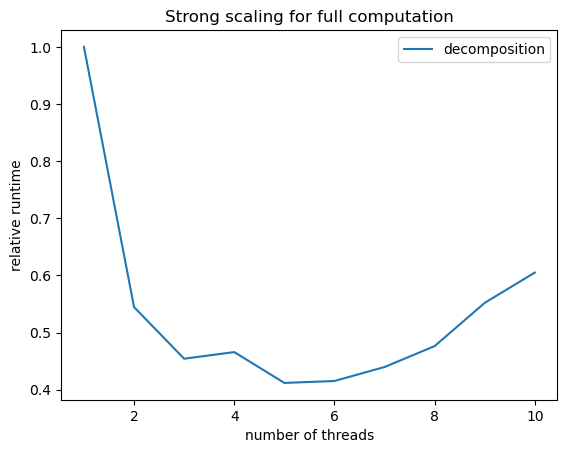

In [10]:
# plot the scaling of performance gains
import os
from time import perf_counter

thread_range = range(1, os.cpu_count() + 1)
run_time_cd = []
for num_threads in thread_range:
    run_time_cd.append(0)
    ensemble.processor.num_threads_full = num_threads
    #ensemble_ce.processor.num_threads_full = num_threads
    for _ in range(1000):
        start = perf_counter()
        ensemble.compute_feature_vector(occu)
        run_time_cd[-1] += perf_counter() - start

        #start = perf_counter()
        #ensemble_ce.compute_feature_vector(occu)
        #run_time_ce[-1] += perf_counter() - start

run_time_cd = np.array(run_time_cd)

import matplotlib.pyplot as plt
plt.plot(thread_range, run_time_cd/run_time_cd[0], label='CD')
plt.title("Strong scaling for full computation")
plt.ylabel("relative runtime")
plt.xlabel("number of threads")
plt.legend(["decomposition", "expansion"])
plt.show()

In [11]:
# run 1M iterations
# since this is the first run, the initial occupancy must be supplied
sampler.run(
    1000000,
    initial_occupancies=init_occu,
    thin_by=100, # thin_by will save every 100th sample only
    progress=True
) # progress will show progress bar

Sampling 1 chain(s) from a cell with 125 sites:   0%|          | 0/1000000 [00:00<?, ?it/s]

Sampling 1 chain(s) from a cell with 125 sites: 100%|██████████| 1000000/1000000 [00:30<00:00, 32399.38it/s]


In [12]:
# print the number of being threads used
print(f"The cluster_subspace is set to use {ensemble.processor.cluster_subspace.num_threads} openmp threads for full computations.")
print(f"The processor is set to use {ensemble.processor.num_threads_full} openmp threads for full computations.")
print(f"The processor is set to use {ensemble.processor.num_threads} openmp threads to compute local changes.")

The cluster_subspace is set to use 2 openmp threads for full computations.
The processor is set to use 2 openmp threads for full computations.
The processor is set to use 2 openmp threads to compute local changes.


In [13]:
# Samples are saved in a sample container
samples = sampler.samples

print(f'Fraction of successful steps (efficiency) {sampler.efficiency()}')
print(f'The last step energy is {samples.get_energies()[-1]} eV')
print(f'The minimum energy in trajectory is {samples.get_minimum_energy()} eV')

# You can get the minimum energy structure and current structure
# by using the ensemble processor
curr_s = ensemble.processor.structure_from_occupancy(samples.get_occupancies()[-1])
min_s = ensemble.processor.structure_from_occupancy(samples.get_minimum_energy_occupancy())

Fraction of successful steps (efficiency) 0.0088
The last step energy is -1117.013300034346 eV
The minimum energy in trajectory is -1118.0234743166766 eV


#### 4.1) Continuing or resetting the MC trajectory
You can always continue running more iterations from where the trajectory left off by calling `run` again.
You can also reset to the initial state. (we will skip this step for now so we can show results from the run above.

In [42]:
# You can continue the MC trajectory simmply by calling run again
# it is recommended to use the same thin_by used before
#sampler.run(10000, thin_by=100)  # this will append new data

# If you want to start from scratch
#sampler.clear_samples()  # this will delete data, and reset the ensemble to its initial state
# Now you can start a fresh run
#sampler.run(1000000,
#             initial_occupancies=init_occu,
#             thin_by=100, # thin_by will save every 100th sample only
#             progress=True) # progress will show progress bar

### 5) Check convergence of MC sampling
Find the minimum number of samples required to discard for equilibration while converging the energy

[-1096.49066102 -1101.25071216 -1104.48792519 ... -1116.99694314
 -1117.01330003 -1117.01330003]


Text(0.5, 1.0, 'Energy of System over MC Steps')

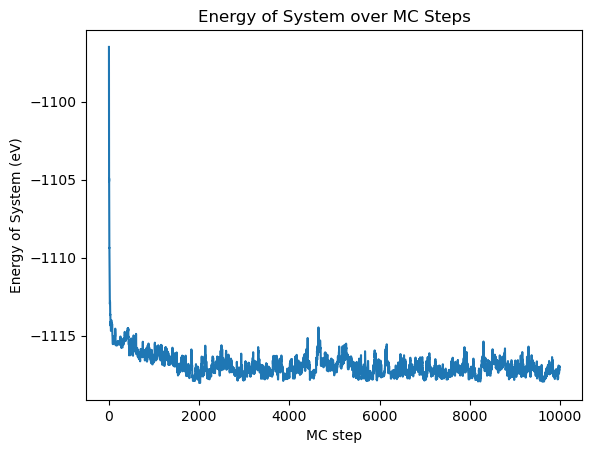

In [14]:
#from smol.moca.analysis.convergence import check_property_converged, determine_discard_number

energies = samples.get_energies()
# 100 as an initial guess for amount to discard
#opt_discard = determine_discard_number(property_array=energies, init_discard=100, verbose=True)
#converged = check_property_converged(energies[opt_discard:])
#print(f'Is the energy converged after discarding the first {opt_discard} samples?', converged)
print(energies)

# let's plot the energy trajectories over time 

import matplotlib.pyplot as plt
runs = np.arange(len(energies))
plt.plot(runs, energies)
plt.xlabel('MC step')
plt.ylabel('Energy of System (eV)')
plt.title('Energy of System over MC Steps')

### 6) Look at trajectory samples and averages
We can look at the sampled energies, the average and variance directly from the class properties.

For further analysis samples are stored as a list of dictionaries for each sampled step in the `CanonicalEnsemble.data` attribute.
In the `CanonicalEnsemble` class only the energy and occupancy string of each sample are saved.

In [15]:
# Set 100 samples for burn-in, as determined in 5)
discard = 100 # this is in terms of samples so it would be discard*thin_by steps
print(f'A total of {len(samples)} samples taken.')
print(f'A total of {len(samples.get_energies(discard=discard))} samples used for production.')
print(f'The average energy is {samples.mean_energy(discard=discard)} eV')
print(f'The energy variance is {samples.energy_variance(discard=discard)} eV^2')
print(f'The sampling efficiency (acceptance rate) is approximately {samples.sampling_efficiency(discard=discard)}')

A total of 10000 samples taken.
A total of 9900 samples used for production.
The average energy is -1116.972210386488 eV
The energy variance is 0.36830247312132325 eV^2
The sampling efficiency (acceptance rate) is approximately 0.008181818181818182


In [23]:
initial_structure = samples.get_sampled_structures(indices=[0])[0]

initial_composition = initial_structure.composition

# initial_composition is a pymatgen Composition object, I want to convert to string, 
print(initial_composition)

#s = '../Expansions/VCrTiWZr/Cr0_0672-Ti0_0428-Zr0_0248-W0_0289-V0_8363_fin_work.mson'
s = '../Expansions/VCrTi_Fixed_125/V0_344-Cr0_328-Ti0_328_fin_work.mson'

# Find the start and end of the substring
start = s.find('VCrTi_Fixed_125/') + len('VCrTi_Fixed_125/')
end = s.find('_fin_work.mson')

# Extract the substring
substring = s[start:end]

print(substring)

V43 Cr41 Ti41
V0_344-Cr0_328-Ti0_328


In [ ]:
print(samples.get)

In [24]:
#write these to cif files
from pymatgen.io.cif import CifWriter
structure_path = '/home/myless/Packages/structure_maker/Visualization/Structures'

#s = expansion_path
path_name = 'VCrTi_Fixed_125/'
start = s.find(path_name) + len(path_name)
end = s.find('_fin_work.mson')
substring = s[start:end]
print(substring)

initial_structure = samples.get_sampled_structures(indices=[0])[0]
print(initial_structure)

# write the initial structure to a CIF file
cif = CifWriter(initial_structure)
total_initial_path = os.path.join(structure_path, substring + '_initial.cif')
cif.write_file(total_initial_path)

# print the last structure 
final_structure = samples.get_sampled_structures(indices=[-1])[0]
print(final_structure)

# write the final structure to a CIF file
cif = CifWriter(final_structure)
total_final_path = os.path.join(structure_path, substring + '_final.cif')
cif.write_file(total_final_path)


V0_344-Cr0_328-Ti0_328
Full Formula (Ti41 V43 Cr41)
Reduced Formula: Ti41V43Cr41
abc   :  13.033682  13.033682  13.033682
angles: 109.471221 109.471221 109.471221
pbc   :       True       True       True
Sites (125)
  #  SP      a    b    c
---  ----  ---  ---  ---
  0  V     0    0    0
  1  Cr    0    0    0.2
  2  V     0    0    0.4
  3  Cr    0    0    0.6
  4  V     0    0    0.8
  5  Cr    0    0.2  0
  6  V     0    0.2  0.2
  7  Ti    0    0.2  0.4
  8  V     0    0.2  0.6
  9  Cr    0    0.2  0.8
 10  Ti    0    0.4  0
 11  Cr    0    0.4  0.2
 12  V     0    0.4  0.4
 13  Ti    0    0.4  0.6
 14  V     0    0.4  0.8
 15  Ti    0    0.6  0
 16  V     0    0.6  0.2
 17  V     0    0.6  0.4
 18  V     0    0.6  0.6
 19  Ti    0    0.6  0.8
 20  Ti    0    0.8  0
 21  V     0    0.8  0.2
 22  Cr    0    0.8  0.4
 23  Ti    0    0.8  0.6
 24  Cr    0    0.8  0.8
 25  Ti    0.2  0    0
 26  V     0.2  0    0.2
 27  V     0.2  0    0.4
 28  V     0.2  0    0.6
 29  Ti    0.2  0    

### Save your work
The `Sampler` class does and can not be saved since it does not really have any computed values. However the `SampleContainter` where the MC samples are recorded can be saved.
You can use the same `save_work` convenience function to save your work.

You can also save the `SampleContainer` as an hdf5 file. You will need `h5py` installed.